In [29]:
import torch
import torch.nn as nn

In [48]:
def f(x):
    return - x + 4 * x ** 2 - 2

x_train = (torch.rand(1000, 1) * 20 - 10).reshape(-1,1)
y_train = f(x_train)

In [49]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(1, 256)
        self.layer2 = nn.Linear(256, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [50]:
for epoch in range(100):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f'Epoch {epoch}: {loss.item()}')

Epoch 0: 32716.201171875
Epoch 20: 7988.0
Epoch 40: 2945.72802734375
Epoch 60: 2189.89794921875
Epoch 80: 1970.22900390625


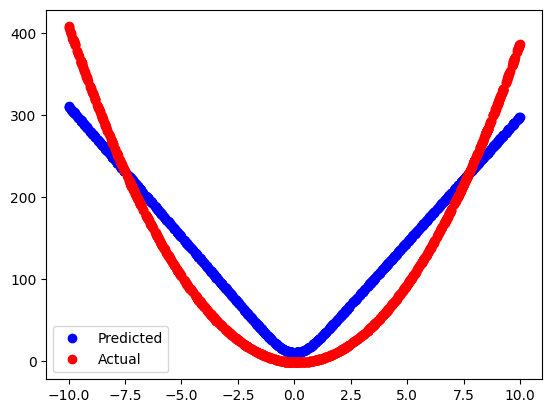

In [51]:
import matplotlib.pyplot as plt
y_pred = model(x_train).detach().numpy()
y_train_np = y_train.numpy()
plt.plot(x_train, y_pred, 'bo', label='Predicted')
plt.plot(x_train, y_train_np, 'ro', label='Actual')
plt.legend()
plt.show()